# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [142]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [143]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [144]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,245
Treatment,153


col_0,Frequency
status,
Control,0.615578
Treatment,0.384422


<font size = "5">

Query with string conditions

In [145]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [146]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,23.772549,5.366013,186.555556,2933.509804,15.751634
std,7.645890,1.653352,98.219738,798.657468,2.735130
min,11.000000,3.000000,68.000000,1760.000000,8.000000
25%,17.000000,4.000000,100.000000,2245.000000,14.300000
50%,23.000000,4.000000,146.000000,2789.000000,15.500000
75%,29.800000,6.000000,250.000000,3520.000000,17.100000
max,46.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,245.000000,245.000000,245.000000,245.000000,245.000000
mean,23.353469,5.510204,197.718367,2993.477551,15.453469
std,7.931616,1.731133,107.849120,876.404042,2.771081
min,9.000000,3.000000,70.000000,1613.000000,8.500000
25%,17.500000,4.000000,105.000000,2219.000000,13.500000
50%,22.300000,4.000000,151.000000,2833.000000,15.300000
75%,28.800000,8.000000,302.000000,3645.000000,17.200000
max,44.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [147]:

carfeatures = pd.read_csv("data_raw/features.csv")
data  = pd.DataFrame([])
data["age"]                   = [18,29,15,32,6]
data["num_underage_siblings"] = [0,0,1,1,0]
data["num_adult_siblings"]    = [1,0,0,1,0]

## Define a Function
fn_iseligible_vote = lambda age: age >= 18
fn_istwenties      = lambda age: (age >= 20) & (age < 30)
fn_sum             = lambda x,y: x + y

def fn_agebracket(age):
    if (age >= 18):
        status = "Adult"
    elif (age >= 10) & (age < 18):
        status = "Adolescent"
    else:
        status = "Child"
    return(status)

data["can_vote"]    = data["age"].apply(fn_iseligible_vote)
data["in_twenties"] = data["age"].apply(fn_istwenties)
data["age_bracket"] = data["age"].apply(fn_agebracket)








<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [148]:

import pandas as pd

carfeatures = pd.read_csv("data_raw/features.csv")

mean_weight = carfeatures["weight"].mean()

## Query with multiple conditions
data_mean = carfeatures.query("(weight <= @mean_weight) & (cylinders == 4)")

display(data_mean)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
14,24.0,4,113,95,2372,15.0,T-1689934
18,27.0,4,97,88,2130,14.5,D-1689978
19,26.0,4,97,46,1835,20.5,V-1689989
20,25.0,4,110,87,2672,17.5,P-1690000
21,24.0,4,107,90,2430,14.5,A-1690011
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [149]:
#largest value

car_ascendingmpg = carfeatures.sort_values(by = "mpg",ascending = True)
display(car_ascendingmpg.iloc[0:5,:])

df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie', 'David'],
                   'age': [25, 30, 35, 40],
                   'salary': [50000, 60000, 70000, 80000],
                   'department': ['sales', 'finance', 'sales', 'finance']})


# sort the DataFrame by the 'salary' column in descending order
df_sorted = df.sort_values('salary', ascending=False)

# use .loc[] to access specific rows or columns based on their labels
# here we select the rows with index labels 0 and 2, and the columns 'name' and 'salary'
result = df_sorted.loc[[0, 2], ['name', 'salary']]

print(result)


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
28,9.0,8,304,193,4732,18.5,H-1690088
25,10.0,8,360,215,4615,14.0,F-1690055
26,10.0,8,307,200,4376,15.0,C-1690066
103,11.0,8,400,150,4997,14.0,C-1690913
124,11.0,8,350,180,3664,11.0,O-1691144


      name  salary
0    Alice   50000
2  Charlie   70000


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [150]:
#randomly assign
#split the data
import pandas as pd
import numpy as np

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status, size = size_dataset, p = prop_status)

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

display(data_treated.describe())
display(data_control.describe())

display(data_treated)
display(data_control)







,mpg,cylinders,displacement,weight,acceleration
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,23.650323,5.393548,190.006452,2934.909677,15.332258
std,7.665688,1.759932,106.970836,854.412302,2.474544
min,9.000000,3.000000,70.000000,1755.000000,8.500000
25%,18.000000,4.000000,104.500000,2190.000000,14.000000
50%,24.000000,4.000000,134.000000,2700.000000,15.200000
75%,30.000000,8.000000,302.000000,3600.000000,16.900000
max,41.500000,8.000000,455.000000,4997.000000,24.800000


,mpg,cylinders,displacement,weight,acceleration
count,243.000000,243.000000,243.000000,243.000000,243.000000
mean,23.427984,5.493827,195.609053,2993.078189,15.718519
std,7.924861,1.664829,102.671181,842.962180,2.919022
min,10.000000,3.000000,68.000000,1613.000000,8.000000
25%,17.000000,4.000000,103.000000,2254.500000,13.650000
50%,22.300000,6.000000,156.000000,2875.000000,15.500000
75%,28.250000,6.000000,259.000000,3607.000000,17.600000
max,46.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
6,14.0,8,454,220,4354,9.0,C-1689846,Treatment
7,14.0,8,440,215,4312,8.5,P-1689857,Treatment
8,14.0,8,455,225,4425,10.0,P-1689868,Treatment
...,...,...,...,...,...,...,...,...
384,32.0,4,91,67,1965,15.7,H-1694004,Treatment
391,36.0,4,135,84,2370,13.0,D-1694081,Treatment
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
5,15.0,8,429,198,4341,10.0,F-1689835,Control
9,15.0,8,390,190,3850,8.5,A-1689879,Control
...,...,...,...,...,...,...,...,...
389,22.0,6,232,112,2835,14.7,F-1694059,Control
390,32.0,4,144,96,2665,13.9,T-1694070,Control
392,27.0,4,151,90,2950,17.3,C-1694092,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [151]:
import pandas as pd

def my_function(y, x, b_0, b_1):
    # compute the predicted values of y using the linear model y = b_0 + b_1*x
    y_pred = b_0 + b_1*x


print(fn_myfunction(x = carfeatures["cylinders"], y = carfeatures["weight"], b0= 1, b1= 2))

    
    # compute the residuals (observed y minus predicted y)
    residuals = y - y_pred
    
    # compute the mean, standard deviation, minimum, and maximum of y, x, and residuals
    y_mean = y.mean()
    y_std = y.std()
    y_min = y.min()
    y_max = y.max()
    
    x_mean = x.mean()
    x_std = x.std()
    x_min = x.min()
    x_max = x.max()
    
    res_mean = residuals.mean()
    res_std = residuals.std()
    res_min = residuals.min()
    res_max = residuals.max()
    
    # return a dictionary with the computed summary statistics
    return {'y_mean': y_mean, 'y_std': y_std, 'y_min': y_min, 'y_max': y_max,
            'x_mean': x_mean, 'x_std': x_std, 'x_min': x_min, 'x_max': x_max,
            'res_mean': res_mean, 'res_std': res_std, 'res_min': res_min, 'res_max': res_max}

# test the function with some example data
subset_0 = pd.DataFrame({'y': [1, 2, 3], 'x': [4, 5, 6]})
subset_1 = pd.DataFrame({'y': [4, 5, 6], 'x': [7, 8, 9]})

stats_0 = my_function(subset_0['y'], subset_0['x'], 0, 1)
stats_1 = my_function(subset_1['y'], subset_1['x'], 0, 1)

print('Subset 0 summary statistics:')
print(stats_0)

print('Subset 1 summary statistics:')
print(stats_1)



IndentationError: unexpected indent (1933303697.py, line 12)

In [155]:
 


def fn_myfunction(y,x,b0,b1):
    y = b1 * x + b0
    return(y.mean())

print(fn_myfunction(x = carfeatures["cylinders"], y = carfeatures["weight"], b0= 1, b1= 2))

    

11.909547738693467


In [157]:
def fn_mse(y, x, b0, b1):
    e2 = np.mean((y - b0 - b1 * x)**2)
    return e2


mse1 = fn_mse(df["weight"], df["Age"], 80, -1)
mse2 = fn_mse(df["Potential"], df["Age"], 80, -0.4)
mse3 = fn_mse(df["Potential"], df["Age"], 80, 1)

print("MSE with b0 = 80 and b1 = -1: ", mse1)
print("MSE with b0 = 80 and b1 = -0.4: ", mse2)
print("MSE with b0 = 80 and b1 = 1: ", mse3)

KeyError: 'Potential'

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

In [ ]:
import matplotlib.pyplot as plt

# extract the variable of interest from the two datasets
var_0 = subset_0['x']
var_1 = subset_1['x']

# create the histogram plots
plt.hist(var_0, bins=10, alpha=0.5, label='Subset 0')
plt.hist(var_1, bins=10, alpha=0.5, label='Subset 1')

# add a legend, label the axes, and the title
plt.legend(loc='upper right')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Histogram of X in Subsets 0 and 1')

# show the plot
plt.show()

#computing overlapping plot
df_8 = carfeatures.query("cylinders == 8")
df_4 = carfeatures.query("cylinders == 4")

plt.scatter(x = df_8["weight"],y = df_8["acceleration"])
plt.scatter(x = df_4["weight"],y = df_4["acceleration"])
plt.legend(labels = ["8","4"],
           title  = "Cylinders")

plt.show()




NameError: name 'subset_0' is not defined

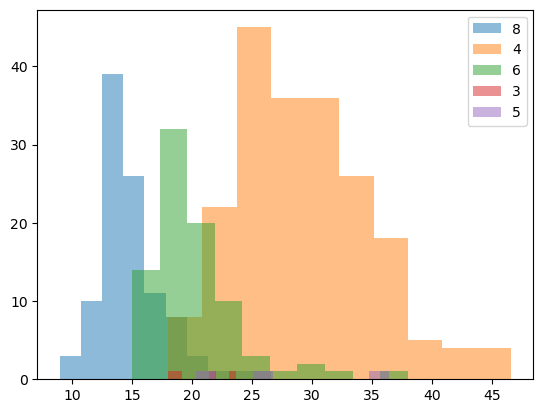

In [ ]:
list_unique_cylinders = pd.unique(carfeatures["cylinders"])

for category_value in list_unique_cylinders:
    temporarydataframe = carfeatures.query("cylinders == @category_value")
    plt.hist(temporarydataframe["mpg"],alpha = 0.5)

plt.legend(labels = list_unique_cylinders)


Text(0.5, 1.0, '*********************')

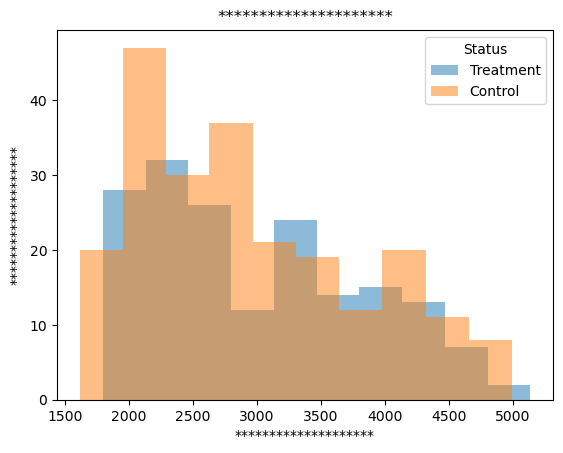

In [ ]:
list_unique_status = pd.unique(carfeatures["status"])

for unique_status in list_unique_status:
    temporarydataframe = carfeatures.query("status == @unique_status")
    plt.hist(temporarydataframe["weight"], alpha=0.5)

plt.legend(labels=list_unique_status, title="Status")

plt.xlabel("********************")
plt.ylabel("********************")
plt.title("*********************")